# RNN(Recurrent Neural Networks)

**Recurrent Neural Networks (RNNs)** are a class of artificial neural networks designed for processing sequential data. Unlike traditional feedforward neural networks, RNNs have connections that loop back on themselves, allowing them to maintain a form of memory.

**Application:** particularly useful when the order of the data points matters, such as predicting the next word in a sentence or the next value in a stock price time series.

# Dataset

The Jena Climate Dataset is a comprehensive dataset that provides hourly weather data recorded in Jena, Germany, over a span of several years (2003-2016).

- **Date Time:** Timestamp of the measurement.
- **rh (%):** Relative humidity as a percentage.
- **p (mbar):** Atmospheric pressure measured in millibars.
- **wv (m/s):** Wind velocity in meters per second
- **T (degC):** Air temperature in degrees Celsius.(**Label/ Target Columns**)

Using Keras and the Weather Dataset with a RNN Model

Date Time           | Temperature (°C) | Humidity (%) | Wind Speed (m/s)
--------------------|-------------------|---------------|-------------------
2003-01-01 00:00:00 |  -1.0             |  88           | 0.3
2003-01-01 01:00:00 |  -1.2             |  89           | 0.2
...


### Import Library and Packages

In [41]:
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import SimpleRNN
from tensorflow import keras
from pathlib import Path
import tensorflow as tf
import pandas as pd
import numpy as np
import os

### Read the data

In [17]:
url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip'

# Define the sibling directory (relative path to your current directory)
sibling_dir = Path.cwd() / 'Storage'  # Adjust this path as needed

# Ensure the sibling directory exists
sibling_dir.mkdir(parents=True, exist_ok=True)

zip_path = keras.utils.get_file('jena_climate_2009_2016.zip', origin=url, extract=True, cache_dir=str(sibling_dir))
csv_path = os.path.splitext(zip_path)[0] + '\\jena_climate_2009_2016.csv'

In [19]:
data = pd.read_csv(csv_path)
data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')
data.set_index('Date Time', inplace=True)

In [20]:
display(data)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [21]:
features = data[['T (degC)', 'p (mbar)', 'rho (g/m**3)', 'wv (m/s)', 'wd (deg)']]
target = data['T (degC)'].shift(-1)  # Predicting next time step temperature

In [22]:
display(features)

,T (degC),p (mbar),rho (g/m**3),wv (m/s),wd (deg)
Date Time,,,,,
2009-01-01 00:10:00,-8.02,996.52,1307.75,1.03,152.3
2009-01-01 00:20:00,-8.41,996.57,1309.80,0.72,136.1
2009-01-01 00:30:00,-8.51,996.53,1310.24,0.19,171.6
2009-01-01 00:40:00,-8.31,996.51,1309.19,0.34,198.0
2009-01-01 00:50:00,-8.27,996.51,1309.00,0.32,214.3
...,...,...,...,...,...
2016-12-31 23:20:00,-4.05,1000.07,1292.98,0.67,240.0
2016-12-31 23:30:00,-3.35,999.93,1289.44,1.14,234.3
2016-12-31 23:40:00,-3.16,999.82,1288.39,1.08,215.2


In [24]:
display(target)

Date Time
2009-01-01 00:10:00   -8.41
2009-01-01 00:20:00   -8.51
2009-01-01 00:30:00   -8.31
2009-01-01 00:40:00   -8.27
2009-01-01 00:50:00   -8.05
                       ... 
2016-12-31 23:20:00   -3.35
2016-12-31 23:30:00   -3.16
2016-12-31 23:40:00   -4.23
2016-12-31 23:50:00   -4.82
2017-01-01 00:00:00     NaN
Name: T (degC), Length: 420551, dtype: float64

In [25]:
# Drop the last row with NaN target
features = features[:-1]
target = target[:-1]

In [26]:
display(features)

,T (degC),p (mbar),rho (g/m**3),wv (m/s),wd (deg)
Date Time,,,,,
2009-01-01 00:10:00,-8.02,996.52,1307.75,1.03,152.3
2009-01-01 00:20:00,-8.41,996.57,1309.80,0.72,136.1
2009-01-01 00:30:00,-8.51,996.53,1310.24,0.19,171.6
2009-01-01 00:40:00,-8.31,996.51,1309.19,0.34,198.0
2009-01-01 00:50:00,-8.27,996.51,1309.00,0.32,214.3
...,...,...,...,...,...
2016-12-31 23:10:00,-3.93,1000.11,1292.41,0.56,202.6
2016-12-31 23:20:00,-4.05,1000.07,1292.98,0.67,240.0
2016-12-31 23:30:00,-3.35,999.93,1289.44,1.14,234.3


In [27]:
display(target)

Date Time
2009-01-01 00:10:00   -8.41
2009-01-01 00:20:00   -8.51
2009-01-01 00:30:00   -8.31
2009-01-01 00:40:00   -8.27
2009-01-01 00:50:00   -8.05
                       ... 
2016-12-31 23:10:00   -4.05
2016-12-31 23:20:00   -3.35
2016-12-31 23:30:00   -3.16
2016-12-31 23:40:00   -4.23
2016-12-31 23:50:00   -4.82
Name: T (degC), Length: 420550, dtype: float64

### Normalize

In [28]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = target.values.reshape(-1, 1)
target_scaled = scaler.fit_transform(target_scaled)

In [29]:
print(features_scaled)

[[0.24863161 0.81493857 0.74321291 0.99726153 0.42305556]
 [0.24216288 0.81542998 0.74934898 0.99723061 0.37805556]
 [0.24050423 0.81503686 0.75066599 0.99717776 0.47666667]
 ...
 [0.32609056 0.84845209 0.68840732 0.9972725  0.65083333]
 [0.329242   0.84737101 0.68526445 0.99726651 0.59777778]
 [0.31149444 0.84727273 0.70073932 0.9973074  0.62722222]]


In [30]:
print(target_scaled)

[[0.24216288]
 [0.24050423]
 [0.24382153]
 ...
 [0.329242  ]
 [0.31149444]
 [0.30170841]]


### Reshape

In [33]:
x = []
y = []
time_steps = 60

for i in range(time_steps, len(features_scaled)):
    x.append(features_scaled[i-time_steps:i])
    y.append(target_scaled[i])

X, y = np.array(x), np.array(y)

Train | Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build the model

In [43]:
model = Sequential()

# Add SimpleRNN layer
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dense(1))

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

### Train and Test the Model

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
9461/9461 ━━━━━━━━━━━━━━━━━━━━ 141s 15ms/step - loss: 0.0027 - val_loss: 4.8502e-05
Epoch 2/50
 233/9461 ━━━━━━━━━━━━━━━━━━━━ 2:22 15ms/step - loss: 5.6783e-05

KeyboardInterrupt: 

### Evalute

In [ ]:
#Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

#Make predictions
predictions = model.predict(X_test)


2629/2629 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 3.8589e-05
Test Loss: 3.742592889466323e-05
2629/2629 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


In [ ]:
# Assuming 'scaler' was fitted on the original data with 5 features (X)
# and you only want to inverse transform the first feature of the predictions:

# Reshape predictions to (84098, 1) if it's not already
predictions = predictions.reshape(-1, 1)

# Create a temporary array with the same number of features as the original data
# Fill it with a default value (e.g., 0)
temp_array = np.zeros((predictions.shape[0], 5))

# Place the predictions in the first column of the temporary array
temp_array[:, 0] = predictions[:, 0]

# Inverse transform the temporary array
predictions_inverse = scaler.inverse_transform(temp_array)

# Extract the inverse transformed predictions for the first feature
predictions_inverse = predictions_inverse[:, 0]

MSE: 3.7425929709347114e-05
MAE: 0.0041053873900264
RMSE: 0.006117673553676031


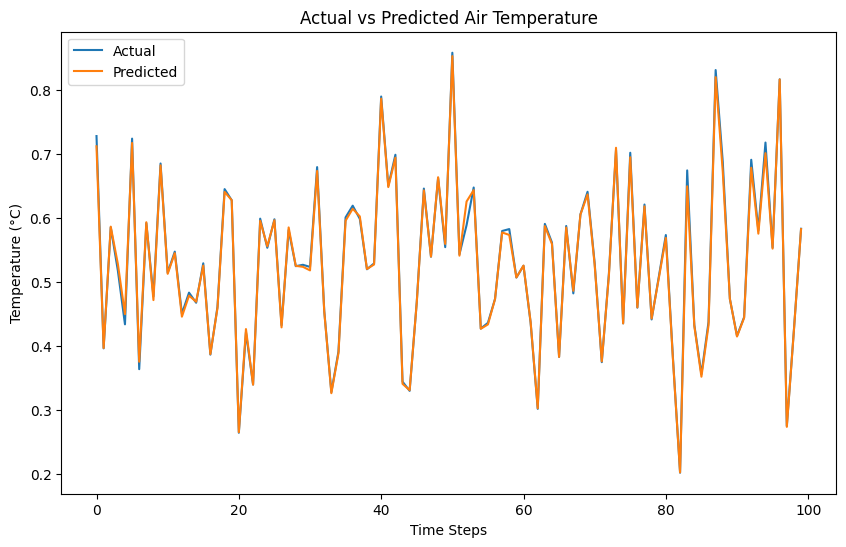

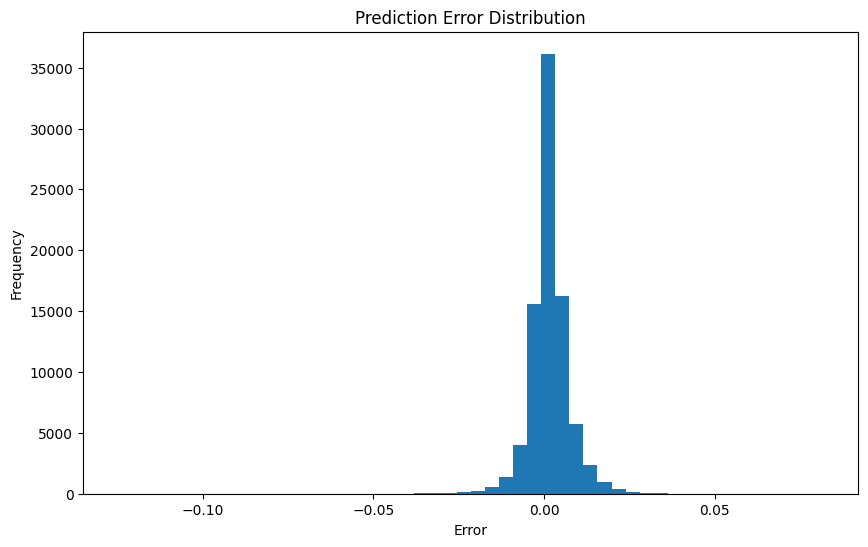

In [ ]:
# Calculate Error Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate errors
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Plot Predictions vs Actual values
plt.figure(figsize=(10,6))
plt.plot(y_test[:100], label='Actual')  # Plot first 100 values
plt.plot(predictions[:100], label='Predicted')
plt.title('Actual vs Predicted Air Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Plot Error Distribution
errors = y_test - predictions
plt.figure(figsize=(10,6))
plt.hist(errors, bins=50)
plt.title('Prediction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
